# GOLDBERG MED GmbH URETIM-TAKIP-SATIS ANALIZI

**Giriş**

Bu proje, Goldberg Med GmbH’nin satış performansını analiz etmek ve iş süreçlerini iyileştirmek için Keşifsel Veri Analizi (EDA) yöntemlerini kullanmayı amaçlayacaktır. Projenin temel hedefi, mevcut veriyi anlamak, olası sorunları belirlemek ve şirketin stratejik karar alma süreçlerine katkıda bulunmaktır.

**Proje Hedefleri:**

1. Mevcut veri setini inceleyerek verinin yapısını ve özelliklerini anlamak.
2. Satış performansı ile ilgili temel trendleri ve desenleri keşfetmek.
3. Verinin kalitesini artırmak için temizleme işlemleri yapmak (eksik ve anormal verileri tespit ve düzeltme).
4. Elde edilen bulgular doğrultusunda, şirketin pazardaki konumunu güçlendirecek öneriler geliştirmek.

**Proje Adımları:**

1. **Veri Toplama ve Tanımlama:** Şirketten elde edilen satış verileri ve iş süreçlerine dair bilgiler incelenecek ve analiz için hazırlanacaktır.
2. **Keşifsel Veri Analizi (EDA):** 
3. **Veri Temizleme:** Veri setindeki eksik veya hatalı veriler tespit edilerek gerekli düzenlemeler yapılacaktır.
3. **Analiz ve Gorsellestirme:** Verinin genel dağılımı, temel istatistikler ve görselleştirme teknikleri ile incelenecektir. Bu adımda, verinin temel trendleri ve değişkenler arasındaki ilişkiler analiz edilecektir.
4. **Bulgular ve Yorumlar:** Elde edilen analiz sonuçları yorumlanarak, satış performansını etkileyen faktörler üzerine odaklanılacaktır.
5. **Sonuçlar ve Öneriler:** Şirketin satışlarını artırmaya yönelik stratejik öneriler geliştirilecek ve ileriye dönük analizlerin yapılması için yol haritası sunulacaktır.

**Sonuçlar:**

Bu proje, Goldberg Med GmbH’nin satış verilerini analiz ederek, performansı artırmaya yönelik içgörüler sunacaktır. Analiz süreci, şirketin iş süreçlerinde verimliliği artırabilecek potansiyel alanları belirleyecek ve bu alanlarda uygulanabilecek stratejiler geliştirecektir. Elde edilen veriler doğrultusunda, şirketin pazar payını artırmak ve satışları optimize etmek için uygulanabilecek öneriler raporda detaylı olarak sunulacaktır.

### Imports Libraries

In [618]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 

from scipy import stats


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

### Import Local `utils1` Modul

In [620]:
#  FONKSIYONLARIMIZI DERLEDIGIMIZ `UTILS` ADINDAKI MODULU BU NOTEBOOK ICINE IMPORT EDIYORUZ

import sys

# utils1.py dosyasının bulunduğu dizini ham dize olarak ekleyin
sys.path.append("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/UTILITIES/")

# 'utils1.py' dosyasında olusturulan Utils sınıfını import et
from utils1 import Utils, UtilsAnalysis

# utils1 icindeki tum class'lardan bir nesne oluştur
utils = Utils()
utils_analysis = UtilsAnalysis()

In [621]:
# utils nesnesindeki tüm fonksiyonları ve öznitelikleri listelemek için
dir(utils)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'df',
 'read_excel_page',
 'save_and_load_csv']

In [622]:
# utils nesnesindeki tüm fonksiyonları ve öznitelikleri listelemek için
dir(UtilsAnalysis)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'detect_anomalies',
 'duplicate_values',
 'find_non_numeric_values',
 'get_value_count',
 'missing_values',
 'na_ratio_plot',
 'numeric_summary',
 'object_summary',
 'rename_columns_by_position',
 'set_df']

In [623]:
help(Utils.read_excel_page)

Help on function read_excel_page in module utils1:

read_excel_page(self)
    Excel dosyasındaki bir sayfayı seçip okuyan fonksiyon.



In [624]:
help(Utils.save_and_load_csv)

Help on function save_and_load_csv in module utils1:

save_and_load_csv(self, filename, dir_path)
    DataFrame'i belirtilen dizine CSV olarak kaydeder ve tekrar yükler.



### User Defined Functions

In [626]:
# =============== User-Defined-Function ==========================

#================ Categorical Features Summary ===================
def object_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()

    # Kategorik sütunlar için özetleme
    object_df = df.select_dtypes(include='object')
    
    # Yeni bir boş DataFrame oluşturma
    summary_df = pd.DataFrame(index=object_df.columns)

    summary_df['Dtype'] = object_df.dtypes
    summary_df['Counts'] = object_df.count()
    summary_df['Nulls'] = object_df.isnull().sum()
    summary_df['NullPercent'] = (object_df.isnull().sum() / obs) * 100
    summary_df['Top'] = object_df.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    summary_df['Frequency'] = object_df.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-')
    summary_df['Uniques'] = object_df.nunique()

    # UniqueValues sütununu kontrol ederek ekleme (dize olarak)
    summary_df['UniqueValues'] = object_df.apply(
        lambda x: ', '.join(map(str, x.unique()[:10])) + '...' if x.nunique() > 10 else ', '.join(map(str, x.unique()))
    )

    # DataFrame şekli ve tekrar eden satır sayısını ekrana yazdırma
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    return summary_df


#================ Numerical Features Summary ===================
def numeric_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()

    # Numerik sütunlar için özetleme
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Yeni bir boş DataFrame oluşturma
    summary_df = pd.DataFrame(index=numeric_df.columns)

    summary_df['Dtype'] = numeric_df.dtypes
    summary_df['Counts'] = numeric_df.count()
    summary_df['Nulls'] = numeric_df.isnull().sum()
    summary_df['NullPercent'] = (numeric_df.isnull().sum() / obs) * 100
    summary_df['Mean'] = numeric_df.mean()
    summary_df['Std'] = numeric_df.std()
    summary_df['Min'] = numeric_df.min()
    summary_df['25%'] = numeric_df.quantile(0.25)
    summary_df['50% (Median)'] = numeric_df.median()
    summary_df['75%'] = numeric_df.quantile(0.75)
    summary_df['Max'] = numeric_df.max()

    # DataFrame şekli ve tekrar eden satır sayısını ekrana yazdırma
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    return summary_df
    

#========== Get count and percentage of values for each column =================
def get_value_count(df, column_name):
    """
    This function calculates and returns a DataFrame with the value counts and 
    their corresponding percentages for a specified column in the DataFrame.
    """
    
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)
    
    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='percent')
    vc_norm['percent'] = (vc_norm['percent'] * 100).map('{:.2f}%'.format)
    
    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['percent']], axis=1)
    return df_result


#============== Checks duplicates and drops them ==========================

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")



# ========== User-Defined-Function for Missing Values ============
def missing_values(df):
    """This function calculates the missing values count and their percentage in a DataFrame."""

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    
    # Format the percentage as '0.00%' with % symbol
    missing_percentage_formatted = missing_percentage.map("{:.2f}%".format)
    # Create a DataFrame to store the results
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage_formatted}) 
    return missing_df


# ========== Plotting Missing Values  ===========================
def na_ratio_plot(df):
    """Plots the ratio of missing values for each feature and prints the count of missing values."""
    
    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

    print(df.isna().sum()[df.isna().sum()>0])

    
    
#========== Detecting Anomalies ================================

def detect_anomalies(df, column_name):
    """
    Detects values with unusual (non-alphanumeric) characters in a column.
    Returns: list: Detected unusual character values.
    """
    # Get the unique values in the column
    unique_values = df[column_name].unique()    
    # Detect values with unusual characters (non-alphanumeric)
    unusual_characters = [val for val in unique_values if isinstance(val, str) and not val.isalnum()]
    
    # Return the list as a single string with values separated by commas
    return ', '.join(unusual_characters)


#========== Detecting Non-Numerical Characters ===========================

import re

def find_non_numeric_values(df, column_name):
    """
    Finds unique non-numeric values in a specified column of the DataFrame.
    """
    pattern = r'\D+'  # Pattern to match non-numeric characters
    # Find and flatten non-numeric values, then ensure uniqueness with set
    return set(re.findall(pattern, ' '.join(df[column_name].astype(str))))


#===============Plot all Categoricals Bar Chart ===========================
def plot_categorical_bar_graphs(df):
    """
    DataFrame'deki tüm kategorik veriler için bar grafikleri oluşturur.
    
    Args:
    - df (DataFrame): Kategorik verileri içeren DataFrame.
    """
    # Kategorik sütunları seçme
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Her kategorik sütun için bar grafiği oluşturma
    for column in categorical_columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(
            x=column, 
            data=df, 
            order=df[column].value_counts().index, 
            palette='Set2'
        )
        ax.bar_label(ax.containers[0], rotation=45)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
#======================================================================


## "ERS" ve "STR"
* Eryiğit Medikal'de kullanılan "ERS" ve "STR" modelleri benzer ürün gruplarına işaret etse de genellikle farklı fonksiyonlara veya kullanım alanlarına sahip cihazları ifade eder. İki model aynı ürün grubunda olabilir, fakat özellikleri veya kullanım amaçları farklılık gösterebilir.

* ERS ve STR modelleri arasındaki farklar:

* ERS Modelleri: Genellikle "Eryiğit Re-Sterilizer" anlamına gelir ve tekrar sterilize edilmesi gereken medikal cihazların sterilizasyon işlemleri için kullanılan ürünleri kapsar. Bu tür cihazlar özellikle hastaneler ve sterilizasyon ünitelerinde yoğun kullanılır.

* STR Modelleri: Sterilizasyon ve dezenfeksiyon işlemleri için kullanılan diğer bir model serisini ifade eder. "STR" modelleri de sterilizasyon için kullanılabilir, ancak teknik özellikleri veya sterilizasyon yöntemi ERS'den farklı olabilir.

## Teksteril ve Goldberg
* Eryiğit Medikal’in Teksteril ve Goldberg serileri de sterilizasyon alanında kullanılan ürün gruplarına ait olup ERS ve STR kategorilerinde değerlendirilebilir, ancak her iki seri kendine özgü özelliklere sahip farklı ürün gruplarıdır.

* Teksteril: Tek kullanımlık sterilizasyon çözümleri sunan bir seri olarak öne çıkar. Genellikle daha hızlı ve pratik bir sterilizasyon sağlamak üzere tasarlanmıştır ve tek kullanımlık olarak düşünülen işlemler için tercih edilir.

* Goldberg: Goldberg serisi ise yüksek kapasiteli ve daha profesyonel sterilizasyon cihazları içerir. Özellikle hastaneler, büyük laboratuvarlar ve klinikler gibi yoğun sterilizasyon ihtiyacı olan yerlerde kullanılmak üzere geliştirilmiştir. Bu seri, yüksek teknoloji ve kapsamlı sterilizasyon süreçleri gerektiren alanlarda tercih edilir.

* Her iki seri de ERS ve STR gruplarında yer alabilir; ancak özel teknik ve işlevsel detayları açısından farklılık gösterir.

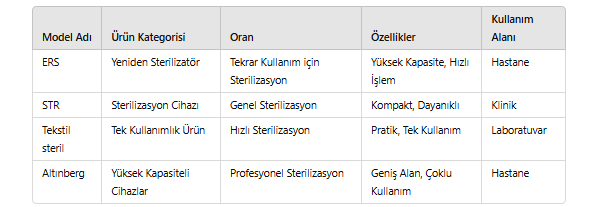

In [630]:

# 1. satır başlıkları kullanarak oku
df_otoklav_24_satis = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=0)
df_otoklav_24_satis.head()


,Sıra No,Modeller,Unnamed: 2,Unnamed: 3,Satış Fiyatı (Dolar),Satış Fiyatı (Dolar).1,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,ERS,STR,GOLDBERG,Yurtiçi,Yurtdışı,Hammadde Maliyeti,Üretim Maliyeti,Teslimat maliyeti
1,1.0,75,75,75,7500,9000,1875,750,Fabrika teslim
2,2.0,75V,75V,75V,7500,9000,1875,750,Fabrika teslim
3,3.0,-,-,100,8400,10000,1875,750,Fabrika teslim
4,4.0,NaN,NaN,100V,8400,10000,1875,750,Fabrika teslim


In [631]:


# Excel dosyasını başlıksız olarak oku
df_otoklav_24_satis = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_otoklav_24_satis.columns = df_otoklav_24_satis.iloc[0].astype(str) + " " + df_otoklav_24_satis.iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_otoklav_24_satis = df_otoklav_24_satis.iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_otoklav_24_satis.head())

# Veriyi CSV dosyasına kaydet
df_otoklav_24_satis.to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Otoklav_Satis.csv", index=False)

  Sıra No nan Modeller ERS nan STR nan GOLDBERG Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           1           75      75           75                         7500                          9000                  1875                 750        Fabrika teslim
1           2          75V     75V          75V                         7500                          9000                  1875                 750        Fabrika teslim
2           3            -       -          100                         8400                         10000                  1875                 750        Fabrika teslim
3           4          NaN     NaN         100V                         8400                         10000                  1875                 750        Fabrika teslim
4           5          NaN     NaN         100H                         8400                         10000                  1875                 

In [632]:
df_otoklav_24_satis.head()

,Sıra No nan,Modeller ERS,nan STR,nan GOLDBERG,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,1,75,75,75,7500,9000,1875,750,Fabrika teslim
1,2,75V,75V,75V,7500,9000,1875,750,Fabrika teslim
2,3,-,-,100,8400,10000,1875,750,Fabrika teslim
3,4,NaN,NaN,100V,8400,10000,1875,750,Fabrika teslim
4,5,NaN,NaN,100H,8400,10000,1875,750,Fabrika teslim


In [633]:

# Excel dosyasını açmak için ExcelFile'i kullanın
excel_dosyasi = pd.ExcelFile("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx")

# 'yıkama' sayfasını okuyun
df_Yıkama_24_satis = pd.read_excel(excel_dosyasi, sheet_name="Yıkama")

# İlk birkaç satırı kontrol edin
print(df_Yıkama_24_satis .head())

   Sıra No   Modeller Unnamed: 2 Satış Fiyatı (Dolar) Satış Fiyatı (Dolar).1         Unnamed: 5       Unnamed: 6         Unnamed: 7
0      NaN  Teksteril   GOLDBERG              Yurtiçi               Yurtdışı  Hammadde Maliyeti  Üretim Maliyeti  Teslimat maliyeti
1      1.0     TSY150      GY150                 7500                   9000               1675              710     Fabrika teslim
2      2.0     TSY225      GY225                10000                  12000               1790              850     Fabrika teslim
3      3.0   TSY290-M    GY225-D                10000                  12000               1790              850     Fabrika teslim
4      4.0   TSY290-O    GY290-M                22000                  25000               6950             2225     Fabrika teslim


In [634]:
df_Yıkama_24_satis.head()

,Sıra No,Modeller,Unnamed: 2,Satış Fiyatı (Dolar),Satış Fiyatı (Dolar).1,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Teksteril,GOLDBERG,Yurtiçi,Yurtdışı,Hammadde Maliyeti,Üretim Maliyeti,Teslimat maliyeti
1,1.0,TSY150,GY150,7500,9000,1675,710,Fabrika teslim
2,2.0,TSY225,GY225,10000,12000,1790,850,Fabrika teslim
3,3.0,TSY290-M,GY225-D,10000,12000,1790,850,Fabrika teslim
4,4.0,TSY290-O,GY290-M,22000,25000,6950,2225,Fabrika teslim


In [635]:
# Excel dosyasını başlıksız olarak oku
df_Yıkama_24_satis  = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None,sheet_name=1)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_Yıkama_24_satis .columns = df_Yıkama_24_satis .iloc[0].astype(str) + " " + df_Yıkama_24_satis .iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_Yıkama_24_satis  = df_Yıkama_24_satis .iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_Yıkama_24_satis .head())

# Veriyi CSV dosyasına kaydet
df_Yıkama_24_satis .to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Yıkama_Satis.csv", index=False)

  Sıra No nan Modeller Teksteril nan GOLDBERG Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           1             TSY150        GY150                         7500                          9000                  1675                 710        Fabrika teslim
1           2             TSY225        GY225                        10000                         12000                  1790                 850        Fabrika teslim
2           3           TSY290-M      GY225-D                        10000                         12000                  1790                 850        Fabrika teslim
3           4           TSY290-O      GY290-M                        22000                         25000                  6950                2225        Fabrika teslim
4           5             TSY360      GY290-S                        22000                         25000                  6950                2225        F

In [636]:
df_Yıkama_24_satis

,Sıra No nan,Modeller Teksteril,nan GOLDBERG,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,1,TSY150,GY150,7500,9000,1675,710,Fabrika teslim
1,2,TSY225,GY225,10000,12000,1790,850,Fabrika teslim
2,3,TSY290-M,GY225-D,10000,12000,1790,850,Fabrika teslim
3,4,TSY290-O,GY290-M,22000,25000,6950,2225,Fabrika teslim
4,5,TSY360,GY290-S,22000,25000,6950,2225,Fabrika teslim
5,6,NaN,GY290-D,22000,25000,6950,2225,Fabrika teslim
6,7,NaN,GY360-S,26000,30000,7750,2270,Fabrika teslim
7,8,NaN,GY360-D,26000,30000,7750,2270,Fabrika teslim
8,9,NaN,GY430-S,27000,32000,8300,3025,Fabrika teslim
9,10,NaN,GY430-D,27000,32000,8300,3025,Fabrika teslim


In [637]:
# Excel dosyasını başlıksız olarak oku
df_Hidrojen_Peroksit_24_satis = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None,sheet_name=2)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_Hidrojen_Peroksit_24_satis .columns = df_Hidrojen_Peroksit_24_satis .iloc[0].astype(str) + " " + df_Hidrojen_Peroksit_24_satis .iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_Hidrojen_Peroksit_24_satis = df_Hidrojen_Peroksit_24_satis .iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_Hidrojen_Peroksit_24_satis.head())

# Veriyi CSV dosyasına kaydet
df_Hidrojen_Peroksit_24_satis .to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Hidrojen_Peroksit_Satis.csv", index=False)

  Sıra No nan Modeller Teksteril nan GOLDBERG Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           1                NaN         GP40                        13000                         16000                  3400                 800        Fabrika teslim
1           2              TSP80         GP80                        24000                         25000                  6350                1750        Fabrika teslim
2           3             TSP120        GP120                        29000                         29000                  7250                2250        Fabrika teslim
3           4                NaN       GP120D                        29000                         29000                  7250                2250        Fabrika teslim
4           5             TSP135        GP135                        27000                         32000                  7600                2250        F

In [638]:
df_Hidrojen_Peroksit_24_satis

,Sıra No nan,Modeller Teksteril,nan GOLDBERG,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,1,NaN,GP40,13000,16000,3400,800,Fabrika teslim
1,2,TSP80,GP80,24000,25000,6350,1750,Fabrika teslim
2,3,TSP120,GP120,29000,29000,7250,2250,Fabrika teslim
3,4,NaN,GP120D,29000,29000,7250,2250,Fabrika teslim
4,5,TSP135,GP135,27000,32000,7600,2250,Fabrika teslim
5,6,NaN,GP135D,27000,32000,7600,2250,Fabrika teslim
6,7,TSP160,GP160,32000,38000,8300,2500,Fabrika teslim
7,8,NaN,GP160D,32000,38000,8300,2500,Fabrika teslim
8,9,TSP200,GP200,35000,42000,8800,2900,Fabrika teslim
9,10,NaN,GP200D,35000,42000,8800,2900,Fabrika teslim


In [639]:

# Excel dosyasını açmak için ExcelFile'i kullanın
excel_dosyasi = pd.ExcelFile("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx")

# 'oksijen' sayfasını okuyun
df_oksijen_24_satis = pd.read_excel(excel_dosyasi, sheet_name="Oksijen")

# İlk birkaç satırı kontrol edin
print(df_oksijen_24_satis .head())

   Sıra No      Modeller Satış Fiyatı (Dolar) Satış Fiyatı (Dolar).1         Unnamed: 4       Unnamed: 5         Unnamed: 6
0      NaN     Teksteril              Yurtiçi               Yurtdışı  Hammadde Maliyeti  Üretim Maliyeti  Teslimat maliyeti
1      1.0   Oxy- Gold–2                  NaN                    NaN                NaN              NaN                NaN
2      2.0  Oxy- Gold –3                  NaN                    NaN                NaN              NaN                NaN
3      3.0  Oxy- Gold –4                  NaN                    NaN                NaN              NaN                NaN
4      4.0  Oxy- Gold –5                  NaN                    NaN                NaN              NaN                NaN


In [640]:
df_oksijen_24_satis

,Sıra No,Modeller,Satış Fiyatı (Dolar),Satış Fiyatı (Dolar).1,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Teksteril,Yurtiçi,Yurtdışı,Hammadde Maliyeti,Üretim Maliyeti,Teslimat maliyeti
1,1.0,Oxy- Gold–2,NaN,NaN,NaN,NaN,NaN
2,2.0,Oxy- Gold –3,NaN,NaN,NaN,NaN,NaN
3,3.0,Oxy- Gold –4,NaN,NaN,NaN,NaN,NaN
4,4.0,Oxy- Gold –5,NaN,NaN,NaN,NaN,NaN
5,5.0,Oxy- Gold –7,NaN,NaN,NaN,NaN,NaN
6,6.0,Oxy- Gold –11,NaN,NaN,NaN,NaN,NaN
7,7.0,Oxy- Gold –15,NaN,NaN,NaN,NaN,NaN
8,8.0,Oxy- Gold –18,NaN,NaN,NaN,NaN,NaN
9,9.0,Oxy- Gold –22,NaN,NaN,NaN,NaN,NaN


In [641]:
# Excel dosyasını başlıksız olarak oku
df_oksijen_24_satis = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None,sheet_name=3)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_oksijen_24_satis .columns = df_oksijen_24_satis .iloc[0].astype(str) + " " +df_oksijen_24_satis.iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_oksijen_24_satis = df_oksijen_24_satis.iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_oksijen_24_satis.head())

# Veriyi CSV dosyasına kaydet
df_oksijen_24_satis .to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Oksijen_Satis.csv", index=False)

  Sıra No nan Modeller Teksteril Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           1        Oxy- Gold–2                          NaN                           NaN                   NaN                 NaN                   NaN
1           2       Oxy- Gold –3                          NaN                           NaN                   NaN                 NaN                   NaN
2           3       Oxy- Gold –4                          NaN                           NaN                   NaN                 NaN                   NaN
3           4       Oxy- Gold –5                          NaN                           NaN                   NaN                 NaN                   NaN
4           5       Oxy- Gold –7                          NaN                           NaN                   NaN                 NaN                   NaN


In [642]:
df_oksijen_24_satis

,Sıra No nan,Modeller Teksteril,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,1,Oxy- Gold–2,NaN,NaN,NaN,NaN,NaN
1,2,Oxy- Gold –3,NaN,NaN,NaN,NaN,NaN
2,3,Oxy- Gold –4,NaN,NaN,NaN,NaN,NaN
3,4,Oxy- Gold –5,NaN,NaN,NaN,NaN,NaN
4,5,Oxy- Gold –7,NaN,NaN,NaN,NaN,NaN
5,6,Oxy- Gold –11,NaN,NaN,NaN,NaN,NaN
6,7,Oxy- Gold –15,NaN,NaN,NaN,NaN,NaN
7,8,Oxy- Gold –18,NaN,NaN,NaN,NaN,NaN
8,9,Oxy- Gold –22,NaN,NaN,NaN,NaN,NaN
9,10,Oxy- Gold –30,NaN,55000,13500,5400,Fabrika teslim


In [643]:


# Excel dosyasını açmak için ExcelFile'i kullanın
excel_dosyasi = pd.ExcelFile("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx")

# 'Reverse Osmoz' sayfasını okuyun
df_Reverse_Osmoz_24_satis = pd.read_excel(excel_dosyasi, sheet_name="Reverse Osmoz")

# İlk birkaç satırı kontrol edin
print(df_Reverse_Osmoz_24_satis .head())

   Sıra No         Modeller Satış Fiyatı (Dolar) Satış Fiyatı (Dolar).1         Unnamed: 4       Unnamed: 5         Unnamed: 6
0      NaN              NaN              Yurtiçi               Yurtdışı  Hammadde Maliyeti  Üretim Maliyeti  Teslimat maliyeti
1      1.0  ERY PREMIUM 121                 3000                   3500               1025              500     Fabrika teslim
2      2.0  ERY PREMIUM 140                 3800                   4500               1200              500     Fabrika teslim
3      3.0  ERY PREMIUM 240                 4800                   5500               1300              500     Fabrika teslim
4      4.0  ERY PREMIUM 340                 5800                   6500               1350              650     Fabrika teslim


In [644]:
df_Reverse_Osmoz_24_satis 

,Sıra No,Modeller,Satış Fiyatı (Dolar),Satış Fiyatı (Dolar).1,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Yurtiçi,Yurtdışı,Hammadde Maliyeti,Üretim Maliyeti,Teslimat maliyeti
1,1.0,ERY PREMIUM 121,3000,3500,1025,500,Fabrika teslim
2,2.0,ERY PREMIUM 140,3800,4500,1200,500,Fabrika teslim
3,3.0,ERY PREMIUM 240,4800,5500,1300,500,Fabrika teslim
4,4.0,ERY PREMIUM 340,5800,6500,1350,650,Fabrika teslim
5,5.0,ERY PREMIUM 440,6300,7500,1500,650,Fabrika teslim
6,6.0,ERY PREMIUM 640,7200,8500,1700,800,Fabrika teslim
7,7.0,ERY PREMIUM 840,8000,10000,2050,900,Fabrika teslim


In [645]:
# Excel dosyasını başlıksız olarak oku
df_Reverse_Osmoz_24_satis  = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None,sheet_name=4)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_Reverse_Osmoz_24_satis  .columns =df_Reverse_Osmoz_24_satis .iloc[0].astype(str) + " " +df_Reverse_Osmoz_24_satis .iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_Reverse_Osmoz_24_satis = df_Reverse_Osmoz_24_satis.iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_Reverse_Osmoz_24_satis .head())

# Veriyi CSV dosyasına kaydet
df_Reverse_Osmoz_24_satis .to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Reverse_Osmoz_Satis.csv", index=False)

  Sıra No nan     Modeller nan Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           1  ERY PREMIUM 121                         3000                          3500                  1025                 500        Fabrika teslim
1           2  ERY PREMIUM 140                         3800                          4500                  1200                 500        Fabrika teslim
2           3  ERY PREMIUM 240                         4800                          5500                  1300                 500        Fabrika teslim
3           4  ERY PREMIUM 340                         5800                          6500                  1350                 650        Fabrika teslim
4           5  ERY PREMIUM 440                         6300                          7500                  1500                 650        Fabrika teslim


In [646]:
df_Reverse_Osmoz_24_satis 

,Sıra No nan,Modeller nan,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,1,ERY PREMIUM 121,3000,3500,1025,500,Fabrika teslim
1,2,ERY PREMIUM 140,3800,4500,1200,500,Fabrika teslim
2,3,ERY PREMIUM 240,4800,5500,1300,500,Fabrika teslim
3,4,ERY PREMIUM 340,5800,6500,1350,650,Fabrika teslim
4,5,ERY PREMIUM 440,6300,7500,1500,650,Fabrika teslim
5,6,ERY PREMIUM 640,7200,8500,1700,800,Fabrika teslim
6,7,ERY PREMIUM 840,8000,10000,2050,900,Fabrika teslim


In [647]:
# Excel dosyasını açmak için ExcelFile'i kullanın
excel_dosyasi = pd.ExcelFile("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx")

# 'Ameliyat Masası' sayfasını okuyun
df_Ameliyat_Masası_24_satis = pd.read_excel(excel_dosyasi, sheet_name="Ameliyat Masası")

# İlk birkaç satırı kontrol edin
print(df_Ameliyat_Masası_24_satis .head())

   Sıra No Modeller Unnamed: 2 Satış Fiyatı (Dolar) Satış Fiyatı (Dolar).1         Unnamed: 5       Unnamed: 6         Unnamed: 7
0      NaN      NaN        NaN              Yurtiçi               Yurtdışı  Hammadde Maliyeti  Üretim Maliyeti  Teslimat maliyeti
1      2.0       3S      2000F                 6500                   7500               1750              500     Fabrika teslim
2      3.0       4S        NaN                 7500                   8000               1900              600     Fabrika teslim
3      4.0       5S        NaN                 9700                  10500               2450              800     Fabrika teslim
4      5.0       6S        NaN                  NaN                    NaN                NaN              NaN     Fabrika teslim


In [648]:
df_Ameliyat_Masası_24_satis

,Sıra No,Modeller,Unnamed: 2,Satış Fiyatı (Dolar),Satış Fiyatı (Dolar).1,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,Yurtiçi,Yurtdışı,Hammadde Maliyeti,Üretim Maliyeti,Teslimat maliyeti
1,2.0,3S,2000F,6500,7500,1750,500,Fabrika teslim
2,3.0,4S,NaN,7500,8000,1900,600,Fabrika teslim
3,4.0,5S,NaN,9700,10500,2450,800,Fabrika teslim
4,5.0,6S,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
5,6.0,STR 2000,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
6,7.0,ERM 201,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
7,8.0,ERM 202,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
8,9.0,ERM 203 T,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
9,10.0,ERM 204,NaN,NaN,NaN,NaN,NaN,Fabrika teslim


In [649]:
# Excel dosyasını başlıksız olarak oku
df_Ameliyat_Masası_24_satis = pd.read_excel("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Satis_Analiz.xlsx", header=None,sheet_name=5)

# İlk iki satırı birleştir ve yeni sütun isimlerini oluştur
df_Ameliyat_Masası_24_satis .columns =df_Ameliyat_Masası_24_satis .iloc[0].astype(str) + " " +df_Ameliyat_Masası_24_satis.iloc[1].astype(str)

# İlk iki satırı sil ve 3. satırdan itibaren veriyi al
df_Ameliyat_Masası_24_satis = df_Ameliyat_Masası_24_satis.iloc[2:].reset_index(drop=True)

# Sütun isimlerini güncelle ve veriyi gözden geçirin
print(df_Ameliyat_Masası_24_satis .head())

# Veriyi CSV dosyasına kaydet
df_Ameliyat_Masası_24_satis.to_csv("C:/Users/ASUS/OneDrive/Masaüstü/inturnship datalar/2024_Ameliyat_Masası_Satis.csv", index=False)


  Sıra No nan Modeller nan nan nan Satış Fiyatı (Dolar) Yurtiçi Satış Fiyatı (Dolar) Yurtdışı nan Hammadde Maliyeti nan Üretim Maliyeti nan Teslimat maliyeti
0           2           3S   2000F                         6500                          7500                  1750                 500        Fabrika teslim
1           3           4S     NaN                         7500                          8000                  1900                 600        Fabrika teslim
2           4           5S     NaN                         9700                         10500                  2450                 800        Fabrika teslim
3           5           6S     NaN                          NaN                           NaN                   NaN                 NaN        Fabrika teslim
4           6     STR 2000     NaN                          NaN                           NaN                   NaN                 NaN        Fabrika teslim


In [650]:
df_Ameliyat_Masası_24_satis

,Sıra No nan,Modeller nan,nan nan,Satış Fiyatı (Dolar) Yurtiçi,Satış Fiyatı (Dolar) Yurtdışı,nan Hammadde Maliyeti,nan Üretim Maliyeti,nan Teslimat maliyeti
0,2,3S,2000F,6500,7500,1750,500,Fabrika teslim
1,3,4S,NaN,7500,8000,1900,600,Fabrika teslim
2,4,5S,NaN,9700,10500,2450,800,Fabrika teslim
3,5,6S,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
4,6,STR 2000,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
5,7,ERM 201,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
6,8,ERM 202,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
7,9,ERM 203 T,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
8,10,ERM 204,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
9,11,TKF 710,NaN,NaN,NaN,NaN,NaN,Fabrika teslim


## Dataların  sütun adları değiştirildi.Kategori sütunu eklendi.Gerekli olmadığı için sıra_no drop edildi.

In [652]:
# Dosya yolunu belirleyin
file_path = '2024_Otoklav_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_otoklav_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_otoklav_24_satis.columns = [
    'sıra_no', 'model_ers', 'model_str', 'model_goldberg', 'satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_otoklav_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_otoklav_24_satis.to_csv('2024_Otoklav_Satis_cleaned.csv', index=False)

   sıra_no model_ers model_str model_goldberg  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü
0        1        75        75             75                         7500                          9000               1875              750  Fabrika teslim
1        2       75V       75V            75V                         7500                          9000               1875              750  Fabrika teslim
2        3         -         -            100                         8400                         10000               1875              750  Fabrika teslim
3        4       NaN       NaN           100V                         8400                         10000               1875              750  Fabrika teslim
4        5       NaN       NaN           100H                         8400                         10000               1875              750  Fabrika teslim


In [653]:
df_otoklav_24_satis.head()

,sıra_no,model_ers,model_str,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,1,75,75,75,7500,9000,1875,750,Fabrika teslim
1,2,75V,75V,75V,7500,9000,1875,750,Fabrika teslim
2,3,-,-,100,8400,10000,1875,750,Fabrika teslim
3,4,NaN,NaN,100V,8400,10000,1875,750,Fabrika teslim
4,5,NaN,NaN,100H,8400,10000,1875,750,Fabrika teslim


In [654]:
df_otoklav_24_satis.insert(0, "kategori", "otoklav")

In [655]:
df_otoklav_24_satis.head()

,kategori,sıra_no,model_ers,model_str,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,otoklav,1,75,75,75,7500,9000,1875,750,Fabrika teslim
1,otoklav,2,75V,75V,75V,7500,9000,1875,750,Fabrika teslim
2,otoklav,3,-,-,100,8400,10000,1875,750,Fabrika teslim
3,otoklav,4,NaN,NaN,100V,8400,10000,1875,750,Fabrika teslim
4,otoklav,5,NaN,NaN,100H,8400,10000,1875,750,Fabrika teslim


In [656]:
df_otoklav_24_satis = df_otoklav_24_satis.drop(columns=["sıra_no"])

In [657]:
df_otoklav_24_satis.head()

,kategori,model_ers,model_str,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,otoklav,75,75,75,7500,9000,1875,750,Fabrika teslim
1,otoklav,75V,75V,75V,7500,9000,1875,750,Fabrika teslim
2,otoklav,-,-,100,8400,10000,1875,750,Fabrika teslim
3,otoklav,NaN,NaN,100V,8400,10000,1875,750,Fabrika teslim
4,otoklav,NaN,NaN,100H,8400,10000,1875,750,Fabrika teslim


In [658]:
# Dosya yolunu belirleyin
file_path = '2024_Yıkama_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_Yıkama_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_Yıkama_24_satis.columns = [
    'sıra_no', 'model_teksteril', 'model_goldberg', 'satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_Yıkama_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_Yıkama_24_satis.to_csv('2024_Yıkama_Satis_cleaned.csv', index=False)

   sıra_no model_teksteril model_goldberg  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü
0        1          TSY150          GY150                         7500                          9000               1675              710  Fabrika teslim
1        2          TSY225          GY225                        10000                         12000               1790              850  Fabrika teslim
2        3        TSY290-M        GY225-D                        10000                         12000               1790              850  Fabrika teslim
3        4        TSY290-O        GY290-M                        22000                         25000               6950             2225  Fabrika teslim
4        5          TSY360        GY290-S                        22000                         25000               6950             2225  Fabrika teslim


In [659]:
df_Yıkama_24_satis.head()

,sıra_no,model_teksteril,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,1,TSY150,GY150,7500,9000,1675,710,Fabrika teslim
1,2,TSY225,GY225,10000,12000,1790,850,Fabrika teslim
2,3,TSY290-M,GY225-D,10000,12000,1790,850,Fabrika teslim
3,4,TSY290-O,GY290-M,22000,25000,6950,2225,Fabrika teslim
4,5,TSY360,GY290-S,22000,25000,6950,2225,Fabrika teslim


In [660]:
df_Yıkama_24_satis.insert(0, "kategori", "Yıkama")

In [661]:
df_Yıkama_24_satis= df_Yıkama_24_satis.drop(columns=["sıra_no"])

In [662]:
df_Yıkama_24_satis

,kategori,model_teksteril,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,Yıkama,TSY150,GY150,7500,9000,1675,710,Fabrika teslim
1,Yıkama,TSY225,GY225,10000,12000,1790,850,Fabrika teslim
2,Yıkama,TSY290-M,GY225-D,10000,12000,1790,850,Fabrika teslim
3,Yıkama,TSY290-O,GY290-M,22000,25000,6950,2225,Fabrika teslim
4,Yıkama,TSY360,GY290-S,22000,25000,6950,2225,Fabrika teslim
5,Yıkama,NaN,GY290-D,22000,25000,6950,2225,Fabrika teslim
6,Yıkama,NaN,GY360-S,26000,30000,7750,2270,Fabrika teslim
7,Yıkama,NaN,GY360-D,26000,30000,7750,2270,Fabrika teslim
8,Yıkama,NaN,GY430-S,27000,32000,8300,3025,Fabrika teslim
9,Yıkama,NaN,GY430-D,27000,32000,8300,3025,Fabrika teslim


In [663]:
# Dosya yolunu belirleyin
file_path = '2024_Hidrojen_Peroksit_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_Hidrojen_Peroksit_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_Hidrojen_Peroksit_24_satis.columns = [
   'sıra_no', 'model_teksteril', 'model_goldberg', 'satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_Hidrojen_Peroksit_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_Hidrojen_Peroksit_24_satis.to_csv('2024_Hidrojen_Peroksit_Satis_cleaned.csv', index=False)

   sıra_no model_teksteril model_goldberg  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü
0        1             NaN           GP40                      13000.0                       16000.0             3400.0            800.0  Fabrika teslim
1        2           TSP80           GP80                      24000.0                       25000.0             6350.0           1750.0  Fabrika teslim
2        3          TSP120          GP120                      29000.0                       29000.0             7250.0           2250.0  Fabrika teslim
3        4             NaN         GP120D                      29000.0                       29000.0             7250.0           2250.0  Fabrika teslim
4        5          TSP135          GP135                      27000.0                       32000.0             7600.0           2250.0  Fabrika teslim


In [664]:
df_Hidrojen_Peroksit_24_satis

,sıra_no,model_teksteril,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,1,NaN,GP40,13000.0,16000.0,3400.0,800.0,Fabrika teslim
1,2,TSP80,GP80,24000.0,25000.0,6350.0,1750.0,Fabrika teslim
2,3,TSP120,GP120,29000.0,29000.0,7250.0,2250.0,Fabrika teslim
3,4,NaN,GP120D,29000.0,29000.0,7250.0,2250.0,Fabrika teslim
4,5,TSP135,GP135,27000.0,32000.0,7600.0,2250.0,Fabrika teslim
5,6,NaN,GP135D,27000.0,32000.0,7600.0,2250.0,Fabrika teslim
6,7,TSP160,GP160,32000.0,38000.0,8300.0,2500.0,Fabrika teslim
7,8,NaN,GP160D,32000.0,38000.0,8300.0,2500.0,Fabrika teslim
8,9,TSP200,GP200,35000.0,42000.0,8800.0,2900.0,Fabrika teslim
9,10,NaN,GP200D,35000.0,42000.0,8800.0,2900.0,Fabrika teslim


In [665]:
df_Hidrojen_Peroksit_24_satis.insert(0, "kategori", "Hidrojen Peroksit")

In [666]:
df_Hidrojen_Peroksit_24_satis = df_Hidrojen_Peroksit_24_satis.drop(columns=["sıra_no"])

In [667]:
df_Hidrojen_Peroksit_24_satis

,kategori,model_teksteril,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,Hidrojen Peroksit,NaN,GP40,13000.0,16000.0,3400.0,800.0,Fabrika teslim
1,Hidrojen Peroksit,TSP80,GP80,24000.0,25000.0,6350.0,1750.0,Fabrika teslim
2,Hidrojen Peroksit,TSP120,GP120,29000.0,29000.0,7250.0,2250.0,Fabrika teslim
3,Hidrojen Peroksit,NaN,GP120D,29000.0,29000.0,7250.0,2250.0,Fabrika teslim
4,Hidrojen Peroksit,TSP135,GP135,27000.0,32000.0,7600.0,2250.0,Fabrika teslim
5,Hidrojen Peroksit,NaN,GP135D,27000.0,32000.0,7600.0,2250.0,Fabrika teslim
6,Hidrojen Peroksit,TSP160,GP160,32000.0,38000.0,8300.0,2500.0,Fabrika teslim
7,Hidrojen Peroksit,NaN,GP160D,32000.0,38000.0,8300.0,2500.0,Fabrika teslim
8,Hidrojen Peroksit,TSP200,GP200,35000.0,42000.0,8800.0,2900.0,Fabrika teslim
9,Hidrojen Peroksit,NaN,GP200D,35000.0,42000.0,8800.0,2900.0,Fabrika teslim


In [668]:
# Dosya yolunu belirleyin
file_path = '2024_Oksijen_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_oksijen_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_oksijen_24_satis.columns = [
    'sıra_no', 'model_teksteril', 'satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_oksijen_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_oksijen_24_satis.to_csv('2024_Oksijen_Satis_cleaned.csv', index=False)

   sıra_no model_teksteril  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti teslimat_türü
0        1     Oxy- Gold–2                          NaN                           NaN                NaN              NaN           NaN
1        2    Oxy- Gold –3                          NaN                           NaN                NaN              NaN           NaN
2        3    Oxy- Gold –4                          NaN                           NaN                NaN              NaN           NaN
3        4    Oxy- Gold –5                          NaN                           NaN                NaN              NaN           NaN
4        5    Oxy- Gold –7                          NaN                           NaN                NaN              NaN           NaN


In [669]:
df_oksijen_24_satis.head()

,sıra_no,model_teksteril,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,1,Oxy- Gold–2,NaN,NaN,NaN,NaN,NaN
1,2,Oxy- Gold –3,NaN,NaN,NaN,NaN,NaN
2,3,Oxy- Gold –4,NaN,NaN,NaN,NaN,NaN
3,4,Oxy- Gold –5,NaN,NaN,NaN,NaN,NaN
4,5,Oxy- Gold –7,NaN,NaN,NaN,NaN,NaN


In [670]:
df_oksijen_24_satis.insert(0, "kategori", "Oksijen")

In [671]:
df_oksijen_24_satis= df_oksijen_24_satis.drop(columns=["sıra_no"])

In [672]:
df_oksijen_24_satis.head(10)

,kategori,model_teksteril,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,Oksijen,Oxy- Gold–2,NaN,NaN,NaN,NaN,NaN
1,Oksijen,Oxy- Gold –3,NaN,NaN,NaN,NaN,NaN
2,Oksijen,Oxy- Gold –4,NaN,NaN,NaN,NaN,NaN
3,Oksijen,Oxy- Gold –5,NaN,NaN,NaN,NaN,NaN
4,Oksijen,Oxy- Gold –7,NaN,NaN,NaN,NaN,NaN
5,Oksijen,Oxy- Gold –11,NaN,NaN,NaN,NaN,NaN
6,Oksijen,Oxy- Gold –15,NaN,NaN,NaN,NaN,NaN
7,Oksijen,Oxy- Gold –18,NaN,NaN,NaN,NaN,NaN
8,Oksijen,Oxy- Gold –22,NaN,NaN,NaN,NaN,NaN
9,Oksijen,Oxy- Gold –30,NaN,55000.0,13500.0,5400.0,Fabrika teslim


In [673]:
# Dosya yolunu belirleyin
file_path = '2024_Reverse_Osmoz_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_Reverse_Osmoz_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_Reverse_Osmoz_24_satis.columns = [
    'sıra_no','model_ery','satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_Reverse_Osmoz_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_Reverse_Osmoz_24_satis.to_csv('2024_Reverse_Osmoz_Satis_cleaned.csv', index=False)

   sıra_no        model_ery  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü
0        1  ERY PREMIUM 121                         3000                          3500               1025              500  Fabrika teslim
1        2  ERY PREMIUM 140                         3800                          4500               1200              500  Fabrika teslim
2        3  ERY PREMIUM 240                         4800                          5500               1300              500  Fabrika teslim
3        4  ERY PREMIUM 340                         5800                          6500               1350              650  Fabrika teslim
4        5  ERY PREMIUM 440                         6300                          7500               1500              650  Fabrika teslim


In [674]:
df_Reverse_Osmoz_24_satis

,sıra_no,model_ery,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,1,ERY PREMIUM 121,3000,3500,1025,500,Fabrika teslim
1,2,ERY PREMIUM 140,3800,4500,1200,500,Fabrika teslim
2,3,ERY PREMIUM 240,4800,5500,1300,500,Fabrika teslim
3,4,ERY PREMIUM 340,5800,6500,1350,650,Fabrika teslim
4,5,ERY PREMIUM 440,6300,7500,1500,650,Fabrika teslim
5,6,ERY PREMIUM 640,7200,8500,1700,800,Fabrika teslim
6,7,ERY PREMIUM 840,8000,10000,2050,900,Fabrika teslim


In [675]:
df_Reverse_Osmoz_24_satis.insert(0, "kategori", "Reverse Osmoz")

In [676]:
df_Reverse_Osmoz_24_satis= df_Reverse_Osmoz_24_satis.drop(columns=["sıra_no"])

In [677]:
df_Reverse_Osmoz_24_satis

,kategori,model_ery,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,Reverse Osmoz,ERY PREMIUM 121,3000,3500,1025,500,Fabrika teslim
1,Reverse Osmoz,ERY PREMIUM 140,3800,4500,1200,500,Fabrika teslim
2,Reverse Osmoz,ERY PREMIUM 240,4800,5500,1300,500,Fabrika teslim
3,Reverse Osmoz,ERY PREMIUM 340,5800,6500,1350,650,Fabrika teslim
4,Reverse Osmoz,ERY PREMIUM 440,6300,7500,1500,650,Fabrika teslim
5,Reverse Osmoz,ERY PREMIUM 640,7200,8500,1700,800,Fabrika teslim
6,Reverse Osmoz,ERY PREMIUM 840,8000,10000,2050,900,Fabrika teslim


* Ameliyat masası kategorisinde modeller alt alta karışık şekilde verilmiş.Diğer model sütununda yazılan 2000F modeli ERM modeline ait olduğunu biraz araştırma yaparak buldum.
 O yüzden o sütuna model model_erm adını verdim.

In [679]:
# Dosya yolunu belirleyin
file_path = '2024_Ameliyat_Masası_Satis.csv'

# İlk satırı atlayarak veriyi yükleyin
df_Ameliyat_Masası_24_satis= pd.read_csv(file_path, skiprows=0)

# Sütun adlarını yeniden tanımlayın
df_Ameliyat_Masası_24_satis.columns = [
    'sıra_no', 'model_karısık','model_erm','satıs_fiyatı(yurtiçi_dolar)',
    'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'
]

# Temizlenmiş veriyi kontrol edin
print(df_Ameliyat_Masası_24_satis.head())

# İsterseniz dosyayı yeni bir dosya olarak kaydedin
df_Ameliyat_Masası_24_satis.to_csv('2024_Ameliyat_Masası_Satis_cleaned.csv', index=False)

   sıra_no model_karısık model_erm  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü
0        2            3S     2000F                       6500.0                        7500.0             1750.0            500.0  Fabrika teslim
1        3            4S       NaN                       7500.0                        8000.0             1900.0            600.0  Fabrika teslim
2        4            5S       NaN                       9700.0                       10500.0             2450.0            800.0  Fabrika teslim
3        5            6S       NaN                          NaN                           NaN                NaN              NaN  Fabrika teslim
4        6      STR 2000       NaN                          NaN                           NaN                NaN              NaN  Fabrika teslim


In [680]:
df_Ameliyat_Masası_24_satis.head()

,sıra_no,model_karısık,model_erm,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,2,3S,2000F,6500.0,7500.0,1750.0,500.0,Fabrika teslim
1,3,4S,NaN,7500.0,8000.0,1900.0,600.0,Fabrika teslim
2,4,5S,NaN,9700.0,10500.0,2450.0,800.0,Fabrika teslim
3,5,6S,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
4,6,STR 2000,NaN,NaN,NaN,NaN,NaN,Fabrika teslim


In [681]:
df_Ameliyat_Masası_24_satis.insert(0, "kategori", "Ameliyat Masası")

In [682]:
df_Ameliyat_Masası_24_satis= df_Ameliyat_Masası_24_satis.drop(columns=["sıra_no"])

In [683]:
df_Ameliyat_Masası_24_satis

,kategori,model_karısık,model_erm,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,Ameliyat Masası,3S,2000F,6500.0,7500.0,1750.0,500.0,Fabrika teslim
1,Ameliyat Masası,4S,NaN,7500.0,8000.0,1900.0,600.0,Fabrika teslim
2,Ameliyat Masası,5S,NaN,9700.0,10500.0,2450.0,800.0,Fabrika teslim
3,Ameliyat Masası,6S,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
4,Ameliyat Masası,STR 2000,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
5,Ameliyat Masası,ERM 201,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
6,Ameliyat Masası,ERM 202,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
7,Ameliyat Masası,ERM 203 T,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
8,Ameliyat Masası,ERM 204,NaN,NaN,NaN,NaN,NaN,Fabrika teslim
9,Ameliyat Masası,TKF 710,NaN,NaN,NaN,NaN,NaN,Fabrika teslim


In [684]:
dataframes = [df_otoklav_24_satis,df_Yıkama_24_satis, df_Hidrojen_Peroksit_24_satis, df_oksijen_24_satis, df_Reverse_Osmoz_24_satis, df_Ameliyat_Masası_24_satis]  # Düzenlenmiş tüm DataFrame'ler
merged_df = pd.concat(dataframes, ignore_index=True)
print(merged_df.head())

  kategori model_ers model_str model_goldberg  satıs_fiyatı(yurtiçi_dolar)  satıs_fiyatı(yurtdışı_dolar)  hammadde_maliyeti  üretim_maliyeti   teslimat_türü model_teksteril model_ery model_karısık model_erm
0  otoklav        75        75             75                       7500.0                        9000.0             1875.0            750.0  Fabrika teslim             NaN       NaN           NaN       NaN
1  otoklav       75V       75V            75V                       7500.0                        9000.0             1875.0            750.0  Fabrika teslim             NaN       NaN           NaN       NaN
2  otoklav         -         -            100                       8400.0                       10000.0             1875.0            750.0  Fabrika teslim             NaN       NaN           NaN       NaN
3  otoklav       NaN       NaN           100V                       8400.0                       10000.0             1875.0            750.0  Fabrika teslim             NaN

In [685]:
merged_df.head()

,kategori,model_ers,model_str,model_goldberg,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü,model_teksteril,model_ery,model_karısık,model_erm
0,otoklav,75,75,75,7500.0,9000.0,1875.0,750.0,Fabrika teslim,NaN,NaN,NaN,NaN
1,otoklav,75V,75V,75V,7500.0,9000.0,1875.0,750.0,Fabrika teslim,NaN,NaN,NaN,NaN
2,otoklav,-,-,100,8400.0,10000.0,1875.0,750.0,Fabrika teslim,NaN,NaN,NaN,NaN
3,otoklav,NaN,NaN,100V,8400.0,10000.0,1875.0,750.0,Fabrika teslim,NaN,NaN,NaN,NaN
4,otoklav,NaN,NaN,100H,8400.0,10000.0,1875.0,750.0,Fabrika teslim,NaN,NaN,NaN,NaN


In [686]:
# Veriyi yükleyin
file_path = 'merge_satis_analiz.csv'  # Dosya yolunuza göre düzenleyin
merged_df = pd.read_csv(file_path)

# Sütunları düzenleyin
# İlgili sütunları sıralamak için önce tüm sütun isimlerini liste halinde alın
columns = merged_df.columns.tolist()

# Yeni sırayı belirleyin
# 'model_goldberg' sütunundan sonraya dört sütunu eklemek için
new_order = columns[:columns.index('model_goldberg') + 1] + \
             ['model_teksteril', 'model_ery', 'model_karısık', 'model_erm'] + \
             columns[columns.index('model_goldberg') + 1: -4]

# Yeni sıralamaya göre veriyi düzenleyin
merged_df = merged_df[new_order]

# Düzenlenmiş veriyi kaydedin
merged_df.to_csv('duzenlenmis_merge_satis_analiz.csv', index=False)


In [687]:
merged_df.to_csv("duzenlenmis_merge_satis_analiz.csv", index=False)

In [688]:
merged_df.head()

,kategori,model_ers,model_str,model_goldberg,model_teksteril,model_ery,model_karısık,model_erm,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,otoklav,75,75,75,NaN,NaN,NaN,NaN,7500.0,9000.0,1875.0,750.0,Fabrika teslim
1,otoklav,75V,75V,75V,NaN,NaN,NaN,NaN,7500.0,9000.0,1875.0,750.0,Fabrika teslim
2,otoklav,-,-,100,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
3,otoklav,NaN,NaN,100V,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
4,otoklav,NaN,NaN,100H,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim


In [689]:
merged_df.columns

Index(['kategori', 'model_ers', 'model_str', 'model_goldberg', 'model_teksteril', 'model_ery', 'model_karısık', 'model_erm', 'satıs_fiyatı(yurtiçi_dolar)', 'satıs_fiyatı(yurtdışı_dolar)', 'hammadde_maliyeti', 'üretim_maliyeti', 'teslimat_türü'], dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)¶

## Understanding the the Data
- Basic statistics
- Info - shape vs..

In [692]:
df = pd.read_csv('duzenlenmis_merge_satis_analiz.csv')
df

,kategori,model_ers,model_str,model_goldberg,model_teksteril,model_ery,model_karısık,model_erm,satıs_fiyatı(yurtiçi_dolar),satıs_fiyatı(yurtdışı_dolar),hammadde_maliyeti,üretim_maliyeti,teslimat_türü
0,otoklav,75,75,75,NaN,NaN,NaN,NaN,7500.0,9000.0,1875.0,750.0,Fabrika teslim
1,otoklav,75V,75V,75V,NaN,NaN,NaN,NaN,7500.0,9000.0,1875.0,750.0,Fabrika teslim
2,otoklav,-,-,100,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
3,otoklav,NaN,NaN,100V,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
4,otoklav,NaN,NaN,100H,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
5,otoklav,NaN,NaN,100HV,NaN,NaN,NaN,NaN,8400.0,10000.0,1875.0,750.0,Fabrika teslim
6,otoklav,4407S,4407S,120S,NaN,NaN,NaN,NaN,12500.0,15000.0,2670.0,1050.0,Fabrika teslim
7,otoklav,-,-,120D,NaN,NaN,NaN,NaN,12500.0,15000.0,2670.0,1050.0,Fabrika teslim
8,otoklav,4410S,4410S,160S,NaN,NaN,NaN,NaN,15000.0,18000.0,4550.0,2250.0,Fabrika teslim
9,otoklav,-,-,160D,NaN,NaN,NaN,NaN,15000.0,18000.0,4550.0,2250.0,Fabrika teslim


In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   kategori                      91 non-null     object 
 1   model_ers                     23 non-null     object 
 2   model_str                     23 non-null     object 
 3   model_goldberg                49 non-null     object 
 4   model_teksteril               34 non-null     object 
 5   model_ery                     7 non-null      object 
 6   model_karısık                 10 non-null     object 
 7   model_erm                     1 non-null      object 
 8   satıs_fiyatı(yurtiçi_dolar)   59 non-null     float64
 9   satıs_fiyatı(yurtdışı_dolar)  66 non-null     float64
 10  hammadde_maliyeti             66 non-null     float64
 11  üretim_maliyeti               66 non-null     float64
 12  teslimat_türü                 74 non-null     object 
dtypes: floa

## Data Cleaning and Transformation

- Her bir feature tek tek inceleme yapilmasi
    - Missing
    - Duplicates
    - Anormal Karakterlerin temizlenmesi
    - ....

## Distributions

- Feature'larinizin detayli analiz ve gorsellestirilmesi

## Correlations

## Feature Engineering

## Feature Selection
- Hangi feauture model icin kullanilmali-neden?

## Save Cleaned Data

# Bulgular ve Yorumlar

# Sonuçlar ve Öneriler